<a href="https://colab.research.google.com/github/olaayman/MachineLearning/blob/master/support_vector_regression_ola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [14]:
dataset = pd.read_csv("Position_Salaries.csv")
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values.reshape(len(x),1)
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
sc_y = StandardScaler() 
y = sc_y.fit_transform(y)
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [16]:
from sklearn.svm import SVR
reg = SVR(kernel="rbf")
reg.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [18]:
y_pred = sc_y.inverse_transform(reg.predict(sc_x.transform([[6.5]])).reshape(-1,1))
print(y_pred)

[[170370.0204065]]


## Visualising the SVR results

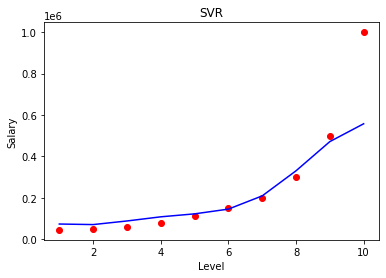

In [20]:
plt.scatter(sc_x.inverse_transform(x) ,sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(reg.predict(x).reshape(-1,1)), color='blue')
plt.title("SVR")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

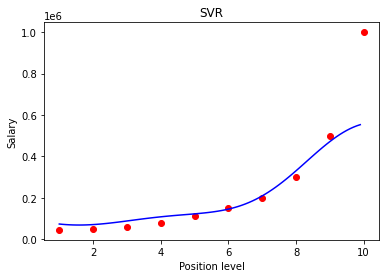

In [24]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(reg.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()